In [1]:
import cv2
import numpy as np
import PIL
import io
import html
import time
import imageio
import matplotlib.pyplot as plt
import BodyTracker as Bt
from utils import *
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw_ndim

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 80 from PyObject


In [2]:
def pose(img):
    
    pTime = 0    
    lmList=[]

    nframes=30 # is the number of saved frames for the function live_tracker
    iterator=0
    angles=[]
    refTime=time.time()
    tracker=live_tracker(nframes)

     #positioning of text and dimensions
    h_angle=50
    w_angle=100
    h_j=65
    w_j=w_angle
    fontScale=2
    thickness=2

    width,height, c=img.shape
    size=(width, height)
    #writer= cv2.VideoWriter('runpose.mp4', cv2.VideoWriter_fourcc('M','J','P','G'), 20, (width,height))
    img = detector.findPose(img)
    lmList = detector.findPosition(img)
    #print(img)
    points=[12, 14, 16]
    p=points
    maxim=max(points)
    angle=0
    lmList1=[]
    inf=60
    sup=140
    #draw angle and perform evaluation
    """if(maxim>len(lmList)):
        draw=False
    if(search(lmList, p[0])  and search(lmList, p[1] ) ) and ( search(lmList, p[2]) ):
        draw=True"""
    angle=detector.findAngle(img, p[0], p[1], p[2]), 
    angles.append(angle)
    if(True):
        judge(img, angle, inf, sup)
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
    lmList1.append(lmList)
    #img = cv2.resize(img, (400, 500))
    
    #ori1.write(img)
    #ori2.write(img)
    #cv2.imshow("Capture1",img)
    #writer.write(img)
    return cTime,lmList1


In [3]:
videoPush2='videos/push2.avi'
videoPush1='videos/push1.avi'
videoPick1='videos/pick1.avi'
videoPick2='videos/pick2.avi'
v1 = "videos/VID_20221222_184119.mp4"
v2 = "videos/VID_20221222_184132.mp4"

In [4]:
detector = Bt.poseDetector()
cap1=cv2.VideoCapture(v1)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp1_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40


#ori1 = cv2.VideoWriter('original1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 15, size)

while True:
    success, img1 = cap1.read()
    
    if success is False or img1 is None:
        break

    cTime1, Kp1=pose(img1)
    #print(Kp1[0])
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()
    kp1_list.append(Kp1)
    
    if (cTime1-refTime)>duration:
        break

    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

cv2.destroyAllWindows()
#ori1.release()
cap1.release()
 


In [ ]:
detector = Bt.poseDetector()

cap2=cv2.VideoCapture(v2)

size = (400, 500)
allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp2_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40


#ori2 = cv2.VideoWriter('original2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 15, size)

while True:
    
    success1, img2 = cap2.read() 

    if success1 is False or img2 is None:
        break

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()
    kp2_list.append(Kp2)
    print(Kp2)
    
    if (cTime2-refTime)>duration:
        break

    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break

cv2.destroyAllWindows()
#ori2.release()
cap2.release() 


#### Check empty elements in Kp1 - Kp2

In [26]:
empty_array_indices_kp1 = []
empty_array_indices_kp2 = []
for i, arr in enumerate(kp1_list):
    if arr.size == 0:
        empty_array_indices_kp1.append(i)

for i, arr in enumerate(kp2_list):
    if arr.size == 0:
        empty_array_indices_kp2.append(i)

print("kp1", empty_array_indices_kp1)
print("kp2", empty_array_indices_kp2)

kp1 []
kp2 []


#### DTW

In [29]:
dtwKp1 = []
dtwKp2 = []

for i in range(0, len(kp1_list)):
    for j in range(0, len(kp1_list[i]), 3):
        dtwKp1.append(kp1_list[i][j+1])
        dtwKp1.append(kp1_list[i][j+2])

for i in range(0, len(kp2_list)):
    for j in range(0, len(kp2_list[i]), 3):
        dtwKp2.append(kp2_list[i][j+1])
        dtwKp2.append(kp2_list[i][j+2])

dtwKp1 = np.array(dtwKp1)
dtwKp2 = np.array(dtwKp2)  

dtwKp1 = dtwKp1.reshape(-1, 2)
dtwKp2 = dtwKp2.reshape(-1, 2)


In [34]:
distance, paths = dtw_ndim.warping_paths(dtwKp1, dtwKp2)

(<Figure size 1000x1000 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

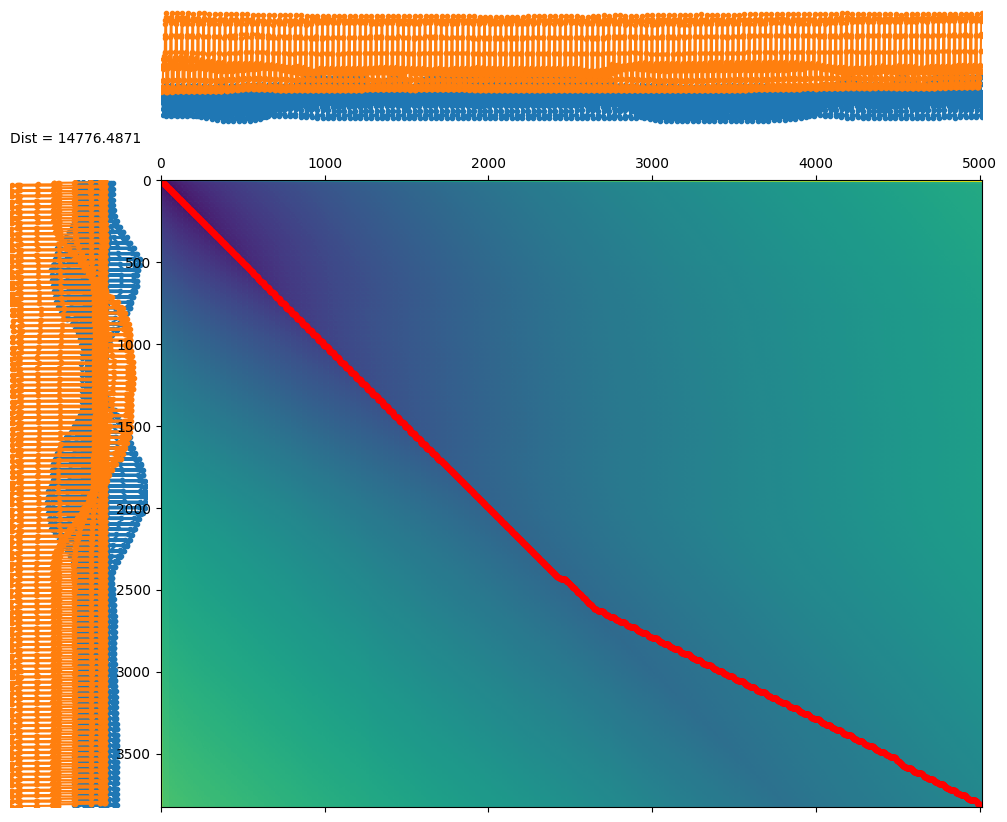

In [46]:
best_path = dtw.best_path(paths)  #take the path with the minimum distance
dtwvis.plot_warpingpaths(dtwKp1, dtwKp2, paths, best_path)

### Show all keypoints in both videos at the same time

In [69]:
width = 600
height = 600
threshold = 0.5

cap1=cv2.VideoCapture(v1)
cap2=cv2.VideoCapture(v2)

cpt = 0

size = (400, 500)
out1 = cv2.VideoWriter('allKp1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size) # Output video
out2 = cv2.VideoWriter('allKp2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size) # Output video

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success1 is False or img2 is None:
        break

    for i in range(0, Kp1.shape[0], 3):
        if len(kp1_list[cpt]) != 0:
            x, y = kp1_list[cpt][i+1], kp1_list[cpt][i+2]
            cv2.circle(img1, (x, y), 4, (0, 0, 255), thickness=3)
            
    
    for i in range(0, Kp2.shape[0], 3):
        if len(kp2_list[cpt]) != 0:
            x, y = kp2_list[cpt][i+1], kp2_list[cpt][i+2]
            cv2.circle(img2, (x, y), 4, (0, 0, 255), thickness=3)
            

    img1 = cv2.resize(img1, size) 
    img2 = cv2.resize(img2, size) 

    out1.write(img1)
    out2.write(img2)

    cpt = cpt+1

    cv2.imshow("Video 1", img1)
    cv2.imshow("Video 2", img2)

    key = cv2.waitKey(50)
    if key == ord('q'):
        break

cv2.destroyAllWindows()
out1.release()
out2.release()
cap1.release()
cap2.release()


In [74]:
print(len(best_path))
print(best_path[0:100])
print(best_path[5600:5612])

5613
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 3), (6, 4), (7, 5), (8, 6), (9, 7), (10, 8), (11, 9), (12, 10), (13, 11), (14, 12), (14, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 36), (38, 36), (39, 37), (40, 38), (41, 39), (42, 40), (43, 41), (44, 42), (45, 43), (46, 44), (47, 45), (47, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 69), (71, 69), (72, 70), (73, 71), (74, 72), (75, 73), (76, 74), (77, 75), (78, 76), (79, 77), (80, 78), (80, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93)]
[(3815, 5004), (

### Show Similar keypoints in both videos at the same time

In [89]:
print(dtwKp1.shape)
print(dtwKp2.shape)
print(dtwKp1[0:10])

(3828, 2)
(5016, 2)
[[329 255]
 [342 234]
 [352 234]
 [361 233]
 [317 235]
 [308 235]
 [298 236]
 [377 247]
 [289 249]
 [349 279]]


In [52]:
kp1_list[0]

array([   0,  329,  255,    1,  342,  234,    2,  352,  234,    3,  361,
        233,    4,  317,  235,    5,  308,  235,    6,  298,  236,    7,
        377,  247,    8,  289,  249,    9,  349,  279,   10,  314,  280,
         11,  450,  375,   12,  231,  378,   13,  498,  526,   14,  201,
        535,   15,  507,  679,   16,  173,  686,   17,  519,  726,   18,
        157,  731,   19,  500,  731,   20,  166,  739,   21,  486,  715,
         22,  187,  726,   23,  399,  679,   24,  281,  680,   25,  399,
        888,   26,  270,  894,   27,  402, 1057,   28,  272, 1067,   29,
        389, 1078,   30,  287, 1090,   31,  432, 1138,   32,  224, 1150])

In [123]:
similarKp1 = []
similarKp2 = []

for i in range(0, len(best_path)):
    similarKp1.append(best_path[i][0])
    similarKp1.append(dtwKp1[best_path[i][0]])
    similarKp2.append(best_path[i][1])
    similarKp2.append(dtwKp2[best_path[i][1]])



In [130]:
print(len(similarKp2))
similarKp1[0:10]

11226


[0,
 array([329, 255]),
 1,
 array([342, 234]),
 2,
 array([352, 234]),
 3,
 array([361, 233]),
 4,
 array([317, 235])]

In [132]:
width = 600
height = 600
threshold = 0.5

cap1=cv2.VideoCapture(v1)
cap2=cv2.VideoCapture(v2)

cpt1 = 0


nbrFrames1 = dtwKp1.shape[0] 
nbrFrames2 = dtwKp2.shape[0] 

size = (400, 500)
out1 = cv2.VideoWriter('allSimilar1.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size) # Output video
out2 = cv2.VideoWriter('allSimilar2.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 10, size) # Output video

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success1 is False or img2 is None:
        break

    for i in range(0, len(similarKp1), 2):
            if (similarKp1[i] > cpt1 and similarKp1[i] < cpt1 + 32):
                x, y = similarKp1[i+1][0], similarKp1[i+1][1]
                cv2.circle(img1, (x, y), 4, (0, 0, 255), thickness=3)
        
    for i in range(0, len(similarKp2), 2):
            if (similarKp2[i] > cpt1 and similarKp2[i] < cpt1 + 32):
                x, y = similarKp2[i+1][0], similarKp2[i+1][1]
                cv2.circle(img2, (x, y), 4, (0, 0, 255), thickness=3)

    img1 = cv2.resize(img1, size) 
    img2 = cv2.resize(img2, size) 

    out1.write(img1)
    out2.write(img2)

    cpt1 = cpt1 + 33

    cv2.imshow("Video 1", img1)
    cv2.imshow("Video 2", img2)

    key = cv2.waitKey(50)
    if key == ord('q'):
        break

cv2.destroyAllWindows()
out1.release()
out2.release()
cap1.release()
cap2.release()
